<font size=5>***Денисова Виктория ИМБО-01-19***




<font size=5>***Практика 3-4. Модель Лотки-Вольтерры и ее модификации.***

In [68]:
import scipy.integrate as integr            
import numpy as np                          
import matplotlib.pyplot as plt

stat_dpi=90
dynamics_pics = (6, 3)
rect_pics = (3, 3)

Численное решение + фазовый портрет

In [69]:
def plot_solution(y1, y2, time, color1 = "violet", color2 = "blue"):
    fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)
    plt.plot(time, y1, c = color1, label = "N1")
    plt.plot(time, y2, c = color2, label = "N2")
    plt.xlabel("time")          
    plt.ylabel("N1, N2")
    plt.title(f"Численное решение системы Хищник-Жертва")
    plt.legend()
    plt.grid(True)              
    plt.show()

In [70]:
def plot_phase_portrait(y1, y2, color = "b", starts = None, nulls = None):
    fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
    plt.plot(y1, y2, c = color)
    
    if starts is not None:
        for i in starts:
            plt.scatter(i[0], i[1], c = color)
    if nulls is not None:
        for i in nulls:
            plt.scatter(i[0], i[1], c = color)
    plt.xlabel("N1")
    plt.ylabel("N2")
    plt.title(f"Фазовый портрет системы Хищник-Жертва")
    plt.grid(True)
    plt.show()

Пак функций системы Лотки-Вольтерры согласно заданию

In [71]:
def lotka(y, t, eps_1=4, gamma_1=3.5, eps_2=4, gamma_2=4, alpha = 0, err = 0): # система Лотки-Вольтерры, классика
    y1, y2 = y
    dy1 = eps_1 * y1 - gamma_1 * y1 * y2 + err
    dy2 = -eps_2 * y2 + gamma_2 * y1 * y2 - err
    return [dy1, dy2]

In [72]:
def lotka_alpha(y, t, eps_1=4, gamma_1=3.5, eps_2=4, gamma_2=4, alpha = 0, err = 0): # система Лотки-Вольтерры с поправкой
    y1, y2=y
    dy1 = eps_1 * y1 - gamma_1 * y1 * y2 + alpha * y1**2 + err
    dy2 = -eps_2 * y2 + gamma_2 * y1 * y2 + alpha * y2**2 - err
    return [dy1, dy2]

In [73]:
def lotka_alpha_diff(y, t, eps_1=4, gamma_1=3.5, eps_2=4, gamma_2=4, alpha = 0, err = 0): # система Лотки-Вольтерры с переменной поправкой альфа
    y1, y2=y
    dy1 = eps_1 * y1 - gamma_1 * y1 * y2 + alpha * y1**2 + err
    dy2 = -eps_2 * y2 + gamma_2 * y1 * y2 - alpha * y2**2 - err
    return [dy1, dy2]

Функция проведения анализа системы с конечными параметрами eps1,2 gamma1,2.

In [74]:
def analyze(f, nulls, starts, alpha = 0, err = 0, time_end = 20):
    time = np.linspace(0, time_end, 5000)
    for i in starts:
        print(f"В точке {i}")
        w = integr.odeint(f, i, time, (5, 4, 2, 2, alpha, err))
        y1 = w[:, 0]
        y2 = w[:, 1]
        
        plot_solution(y1, y2, time)
        plot_phase_portrait(y1, y2, starts = [i], nulls = nulls)

Задание начальных и особых точек.

В точке [0, 0]


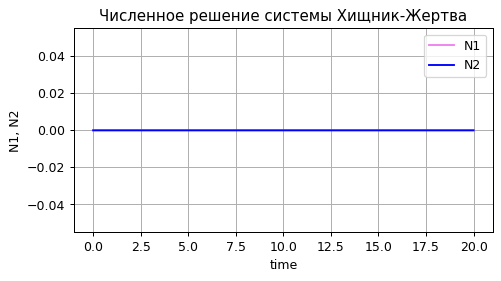

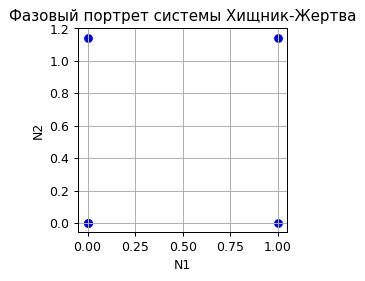

В точке [1, 1]


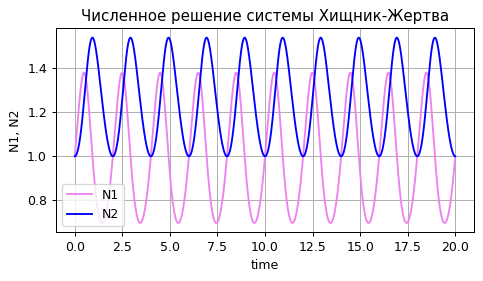

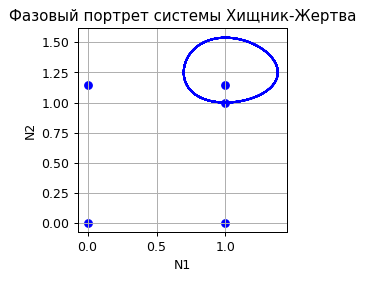

В точке [3, 3]


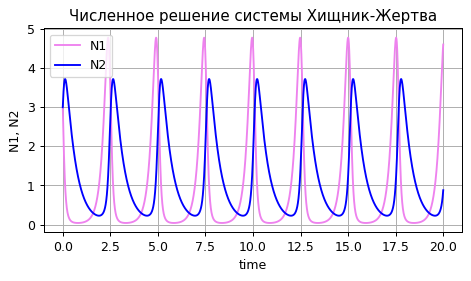

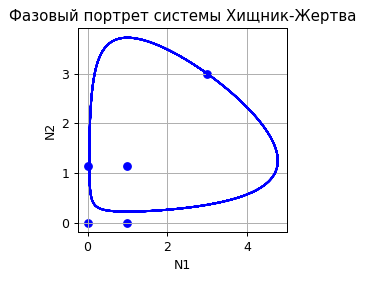

In [75]:
starts = [
    [0, 0],
    [1, 1],
    [3, 3]
]

nulls = [
    [0, 0],
    [0, 4 / 3.5],
    [1, 0],
    [1, 4 / 3.5]
]

analyze(lotka, nulls, starts)

В точке [0, 0]


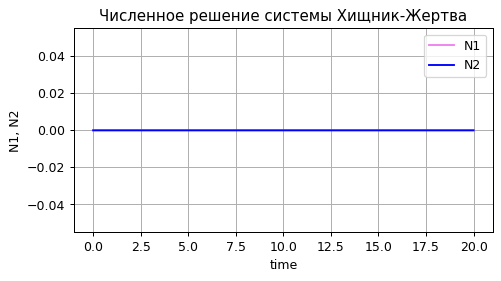

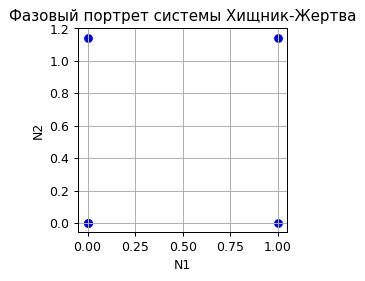

В точке [1, 1]


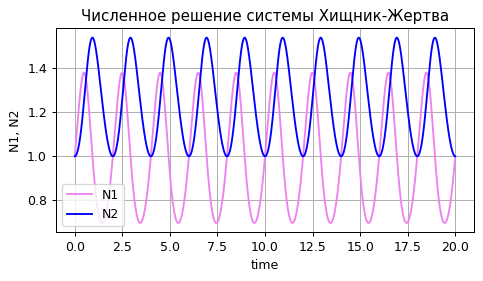

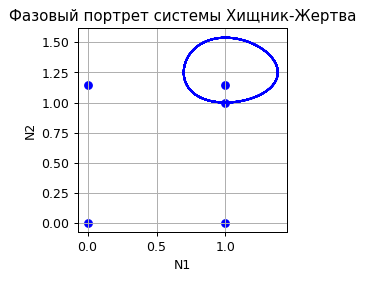

В точке [3, 3]


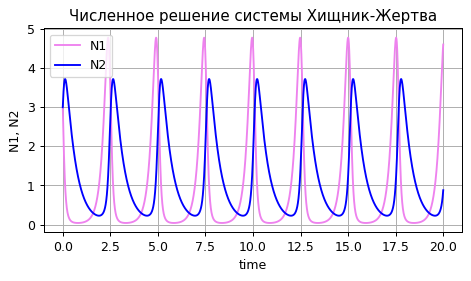

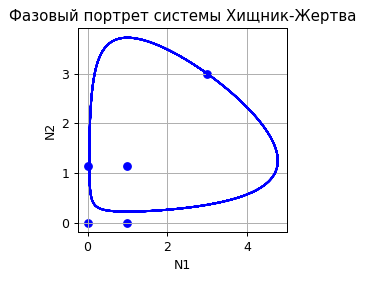

In [76]:
starts = [
    [0, 0],
    [1, 1],
    [3, 3]
]

nulls = [
    [0, 0],
    [0, 4 / 3.5],
    [1, 0],
    [1, 4 / 3.5]
]

analyze(lotka, nulls, starts)

Вывод, классическая модель структурно не устойчива, при малейших отклонениях точка центра переходит в предельный цикл

В точке [0, 0]


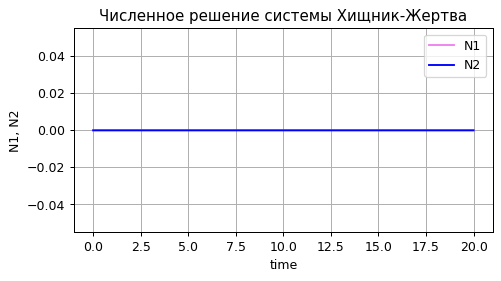

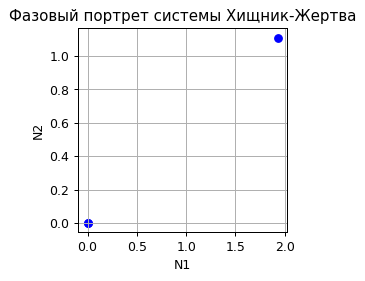

В точке [1, 1]


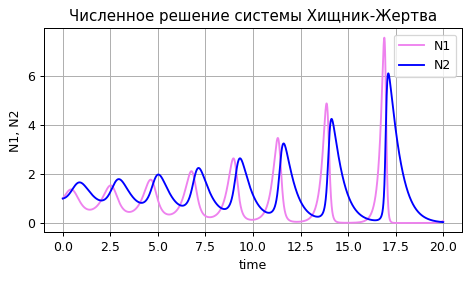

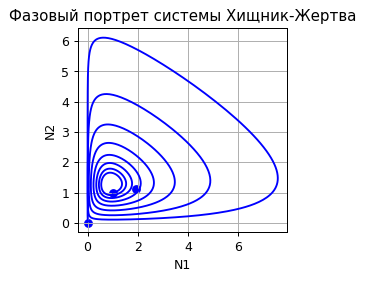

В точке [3, 3]


/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


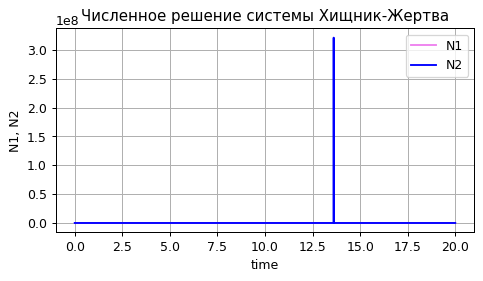

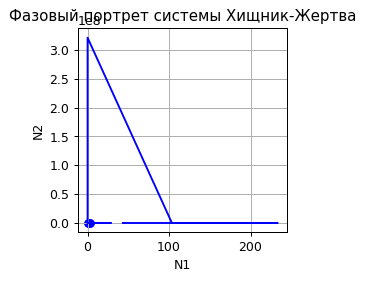

In [77]:
starts = [
    [0, 0],
    [1, 1],
    [3, 3]
]

nulls = [
    [0, 0],
    [1.93, 1.11]
]

analyze(lotka_alpha, nulls, starts, alpha = 0.12)

В точке [0, 0]


/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


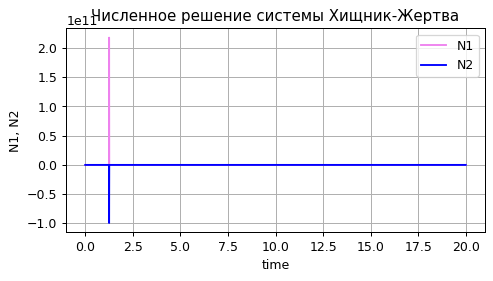

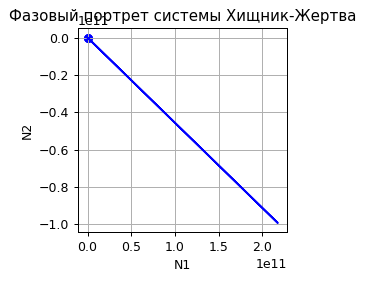

В точке [1, 1]


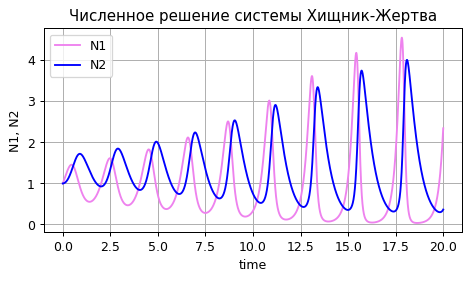

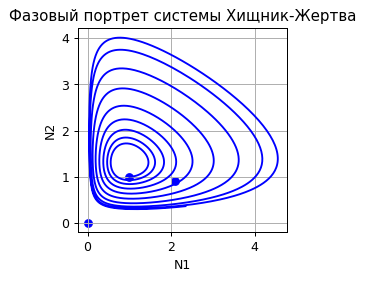

В точке [2, 2]


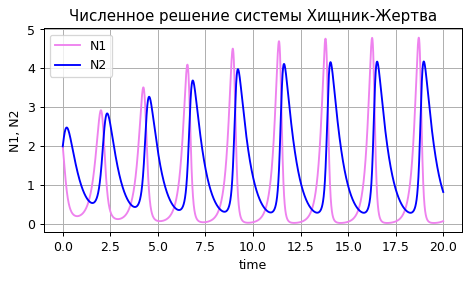

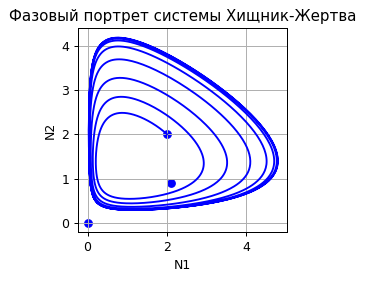

In [78]:
starts = [
    [0, 0],
    [1, 1],
    [2, 2]
]

nulls = [
    [0, 0],
    [2.1, 0.9]
]

analyze(lotka_alpha, nulls, starts, alpha = 0.12, err = 0.1)

Вывод: модифицированная модель структурно устойчива, тип - неустойчивый фокус.

В точке [0, 0]


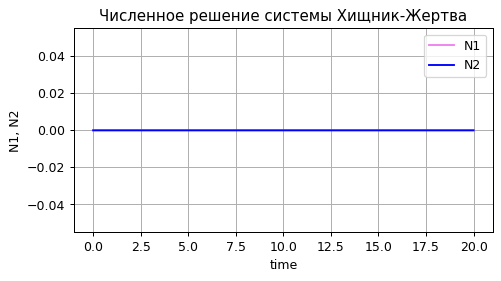

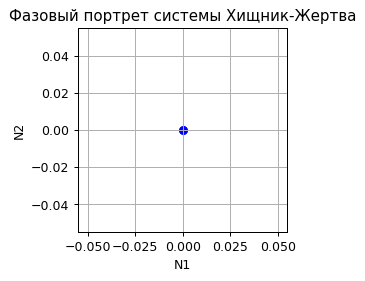

В точке [1, 1]


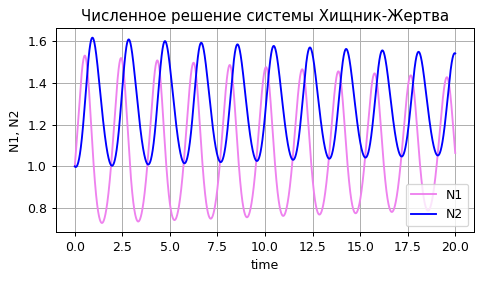

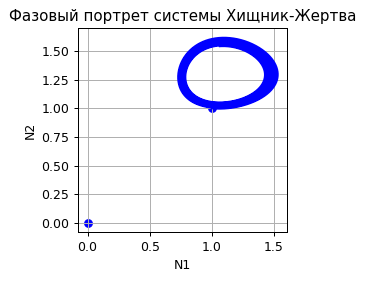

В точке [3, 3]


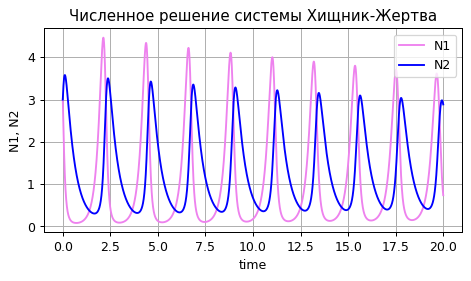

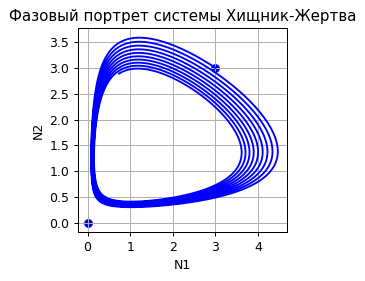

In [79]:
starts = [
    [0, 0],
    [1, 1],
    [3, 3]
]

nulls = [
    [0, 0]
]

analyze(lotka_alpha_diff, nulls, starts, alpha = 0.12)

В точке [0, 0]


/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


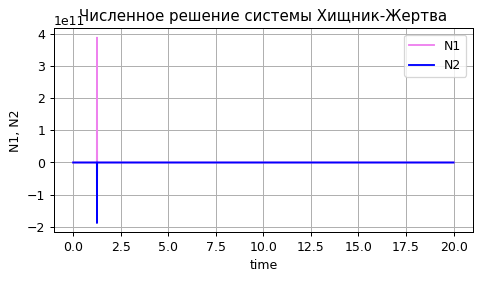

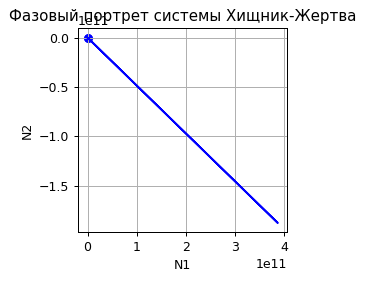

В точке [1, 1]


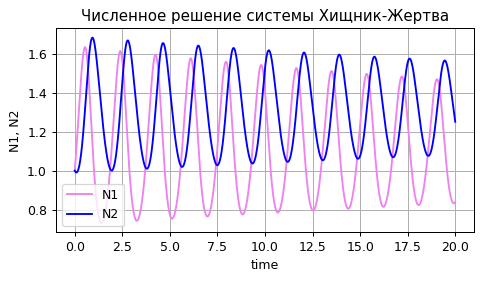

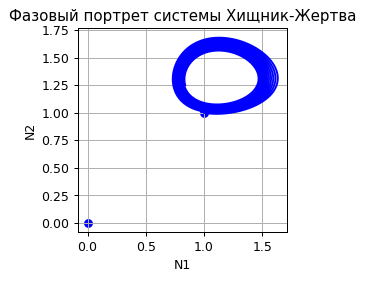

В точке [3, 3]


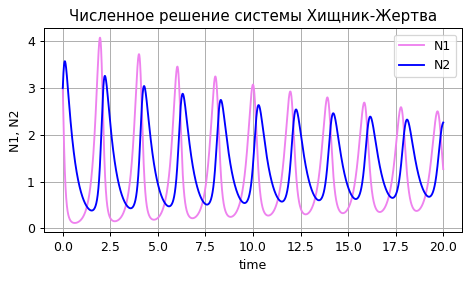

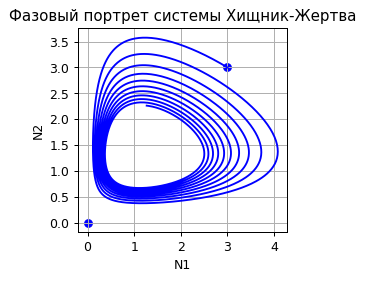

In [80]:
starts = [
    [0, 0],
    [1, 1],
    [3, 3]
]

nulls = [
    [0, 0]
]

analyze(lotka_alpha_diff, nulls, starts, alpha = 0.12, err = 0.1)

Вывод: модель лотки Вольтерры с разными поправками структурно устойчива.